<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/Final_CNN_Model(Seizure_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Loading the Dataset

In [3]:
data_dir = "/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/"
num_classes = 2

# Train Test Split

In [4]:
datagen = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split = 0.25
)

train_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (250,250),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = True,
    subset = 'training',
    class_mode = 'binary'
)

valid_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (250,250),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = False,
    subset = 'validation',
    class_mode = 'binary'

)

Found 760 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [5]:
input_shape = train_gen.image_shape
input_shape

(250, 250, 3)

# Building CNN Model

In [6]:
model = Sequential([
                    Conv2D(16,(6,6),
                            strides=2,
                            activation="relu",
                            padding='same',
                            input_shape=input_shape),
                    MaxPooling2D(pool_size = 2,strides=1),
                    Dropout(0.5),
                    Conv2D(32,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    Conv2D(64,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    
                    Flatten(),
                    Dense(256,activation = 'relu'),
                    Dropout(0.5),
                    #Dense(512,activation = 'relu'),
                    #Dropout(0.5),
                    Dense(2,activation = 'softmax')
                    
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 125, 125, 16)      1744      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 124, 124, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 123, 123, 32)      0

In [8]:
callback_list = EarlyStopping(monitor = 'val_loss',
                              patience = 20,
                              restore_best_weights=True)

In [9]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.0005),
              metrics = ['accuracy'])

In [10]:
Epoch = 200
batchSize = 32

history = model.fit(train_gen,
                    batch_size = batchSize,
                    epochs=Epoch,
                    callbacks=[callback_list],
                    validation_data=valid_gen,
                    verbose = 1)

Epoch 1/200
26/26 [==============================] - 175s 7s/step - loss: 38.6134 - accuracy: 0.5289 - val_loss: 0.6628 - val_accuracy: 0.5692
Epoch 2/200
26/26 [==============================] - 154s 6s/step - loss: 0.7701 - accuracy: 0.6013 - val_loss: 0.6670 - val_accuracy: 0.8063
Epoch 3/200
26/26 [==============================] - 153s 6s/step - loss: 0.5251 - accuracy: 0.7474 - val_loss: 0.6329 - val_accuracy: 0.8656
Epoch 4/200
26/26 [==============================] - 165s 6s/step - loss: 0.3677 - accuracy: 0.8816 - val_loss: 0.4040 - val_accuracy: 0.8617
Epoch 5/200
26/26 [==============================] - 154s 6s/step - loss: 0.2604 - accuracy: 0.9184 - val_loss: 0.4236 - val_accuracy: 0.8340
Epoch 6/200
26/26 [==============================] - 153s 6s/step - loss: 0.2166 - accuracy: 0.9211 - val_loss: 0.3598 - val_accuracy: 0.8735
Epoch 7/200
26/26 [==============================] - 157s 6s/step - loss: 0.1714 - accuracy: 0.9342 - val_loss: 0.3171 - val_accuracy: 0.8933
Epoch

# Accuracy

In [36]:
a = model.evaluate(train_gen)

26/26 [==============================] - 37s 1s/step - loss: 0.0552 - accuracy: 0.9829


In [37]:
b = model.evaluate(valid_gen)

9/9 [==============================] - 11s 1s/step - loss: 0.2097 - accuracy: 0.9130


In [38]:
print ('Training Accuracy:', a[1] )
print ('Validation Accuracy:', b[1])

Training Accuracy: 0.9828947186470032
Validation Accuracy: 0.9130434989929199


# Plot of Accuracy & Loss 

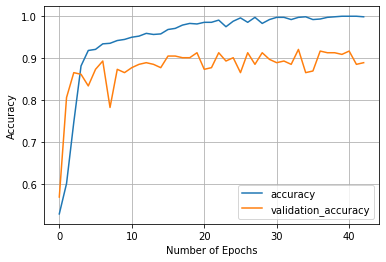

In [40]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

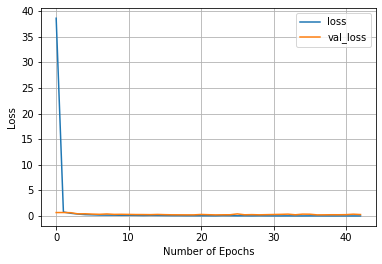

In [41]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


# Classification Report & Confusion Matrix

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = []

for key in train_gen.class_indices:
    target_names.append(key)


y_pred = model.predict_generator(valid_gen)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(valid_gen.classes, y_pred)

print (cm)

print('\n')

print('Classification Report')
print(classification_report(valid_gen.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if __name__ == '__main__':


Confusion Matrix
[[115  12]
 [ 10 116]]


Classification Report
              precision    recall  f1-score   support

      Normal       0.92      0.91      0.91       127
     Seizure       0.91      0.92      0.91       126

    accuracy                           0.91       253
   macro avg       0.91      0.91      0.91       253
weighted avg       0.91      0.91      0.91       253



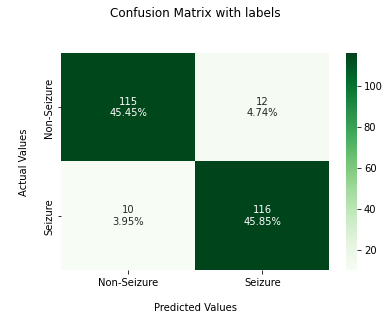

In [46]:
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]
          
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, fmt = '' ,annot=labels, cmap = 'Greens')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n');

ax.xaxis.set_ticklabels(['Non-Seizure','Seizure'])
ax.yaxis.set_ticklabels(['Non-Seizure','Seizure'])

plt.show()

# Plot of ROC(Receiver Operating Characteristic) Curve

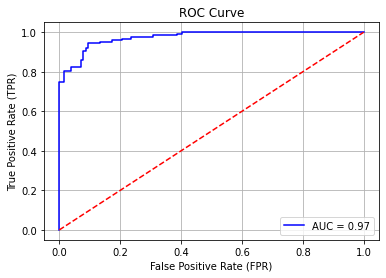

In [48]:
import sklearn.metrics as metrics
y_pred_keras = model.predict(valid_gen)
preds = y_pred_keras[:,1]
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(valid_gen.classes, preds)
roc_auc = metrics.auc(fpr_keras, tpr_keras)

plt.title('ROC Curve')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.grid()
plt.show()

# Sample I/O Checking

In [49]:
from tensorflow.keras.preprocessing import image

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [51]:
def predictImage(file_name):
    image1 = image.load_img(file_name,target_size=(250,250))
    plt.imshow(image1)
    Y = image.img_to_array(image1)
    X = np.expand_dims(Y,axis=0)
    value = model.predict(X)
    v = np.argmax(value)
    print(v)
    if v == 1: 
        plt.xlabel("Seizure",fontsize= 20)
    elif v == 0:
        
        plt.xlabel("Non-Seizure",fontsize= 20)

1


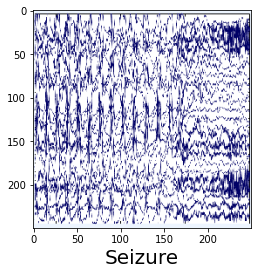

In [52]:
predictImage('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Seizure/394.PNG')

0


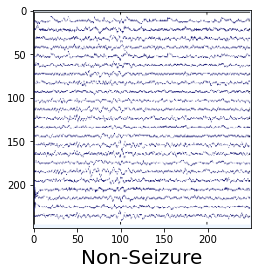

In [53]:
predictImage('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/351.PNG')